# Laboratory #03 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Use will have to mount your drive to access the images.

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, feature, filters, io, transform
from pathlib import Path
from skimage.util import img_as_float

DATA_FOLDER = Path("./images")

# Template Matching

**Exercise #1: Normalized correlation**

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.
*   *Note: Normalize image before applying match_templates.*

In [2]:
# solution
einsteinImage = io.imread(DATA_FOLDER / 'einstein.png')
patternImage = io.imread(DATA_FOLDER / 'template.png')
einsteinImage = img_as_float(einsteinImage)
patternImage = img_as_float(patternImage)
correlatedImage = feature.match_template(einsteinImage, patternImage)

In [3]:
def plotImages(images:dict, **kwargs) -> None:
    f, ax = plt.subplots(1, len(images), figsize=(15, 9))
    for imageIdx, (title, image) in enumerate(images.items()):
        ax[imageIdx].set_title(title)
        ax[imageIdx].imshow(image, **kwargs)
        ax[imageIdx].axis('off')
    plt.plot()

def plotImageMatrix(images:dict, grid=(2, 2), **kwargs) -> None:
    f, ax = plt.subplots(grid[0], grid[1], figsize=(15, 9))
    for imageIdx, (title, image) in enumerate(images.items()):
        ax[imageIdx//2][imageIdx%2].set_title(title)
        ax[imageIdx//2][imageIdx%2].imshow(image, **kwargs)
        ax[imageIdx//2][imageIdx%2].axis('off')
    plt.plot()

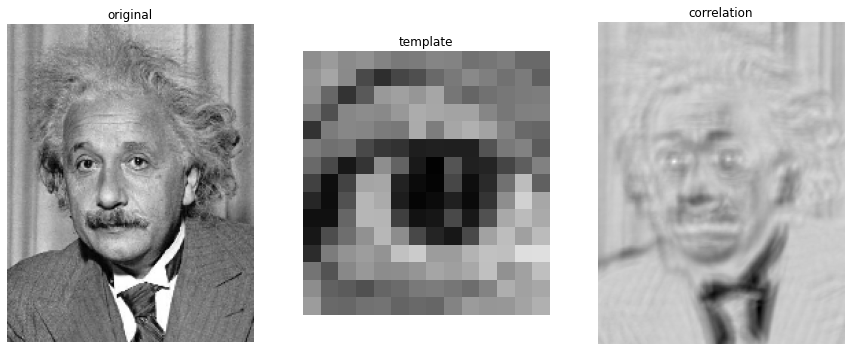

In [4]:
images = {
    "original": einsteinImage,
    "template": patternImage,
    "correlation": correlatedImage
}
plotImages(images, cmap='gray')

Output of the match_template function gives the response image with correlation coefficients. To visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input. The function should return the result of the matching as a white point if it matches, black otherwise (Thresholded image).
*   Add the thresholded image to the visualization of the previous output.

In [5]:
# solution
def getMatch(crossCorrelation, threshold=.8):
    return (crossCorrelation >= threshold).astype(np.int)

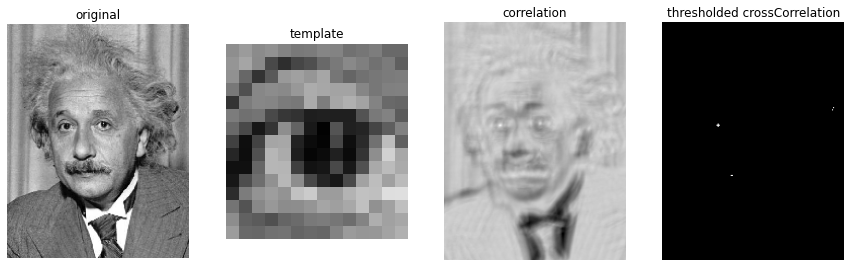

In [20]:
images["thresholded crossCorrelation"] = getMatch(correlatedImage, .85)
plotImages(images, cmap='gray')

**Exercise #2: Effect of contrast**

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

In [7]:
# solution



*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

In [8]:
# solution



*   Do you find any differences in results with respect to contrast changes? 
*   If yes, why do you find those differences? If no, why there is no difference?

**Solution**

*(Double-click or enter to edit)*

...

*   What are the minimal distance pixels in the correlation images of original image and masked image?


In [9]:
# solution



*   Using the thresholded image, obtain the position of the left eye and also calculate the position of the right eye (*Hint:The right eye would be in the same row as that of the left eye*).

In [10]:
# solution



*   What are the distances between the template and the image around the eyes of the image in the original image and the masked image?

In [11]:
# solution



*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

In [12]:
# solution



**Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

In [13]:
# solution



*   What do you infer with respect to rotation?

**Solution**

*(Double-click or enter to edit)*

...

# Histogram of Oriented Gaussians

**Exercise #1: HOG Image Visualization**

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


In [14]:
# solution



*   HoG returns feature descriptors and hog image. What do you infer from each term of the feature descriptors in the output of hog function?

**Solution**

*(Double-click or enter to edit)*

...

*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

In [15]:
# solution



*   What do you infer from the parameters orientation and pixels_per_cell?


**Solution**

*(Double-click or enter to edit)*

...

**Exercise #2: Pedestrian detection**

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal values)
*   Visualize the original image and the hog_image using matplotlib. Show different parameter selection steps also.

In [16]:
# solution




*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Compare the hog descriptors with the hog descriptor of the person_template
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a n x 5 subplot. *Note: For each image, show the original image (1), best match region using a bounding box in the image, best match region using a bounding box in the hog_image for euclidean distance (2,3), for dot product (4,5)*


In [17]:
# solution



*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

*(Double-click or enter to edit)*

...

*   What is the failure rate for dot product and what is the failure rate for euclidean distance?
*   Are there differenes? If yes, what are the possible reasons for difference between these two methods? 

**Solution**

*(Double-click or enter to edit)*

...

*   Provide a detailed comparison between template matching and HOG. What are the advantages of HOG over template matching algorithm.

**Solution**

*(Double-click or enter to edit)*

...


---

## **End of P3: Template Matching and HOG**
Deadline for P3 submission in CampusVirtual is: **Thursday, the 22nd of October, 2020**
